# Explore here

Predicting Diabetes

This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to predict, based on diagnostic measures, whether or not a patient has diabetes.

In this dataset, you will find the following variables:

Pregnancies. Number of pregnancies of the patient (numeric)

Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)

BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)

SkinThickness. Triceps skin fold thickness (measured in mm) (numeric)

Insulin. 2-hour serum insulin measures the level of insulin in your blood two hours after drinking a high glucose beverage. (measured in mu U/ml) (numeric)

BMI. Body mass index (numeric)

DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)

Age. Age of patient (numeric)

Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from pickle import dump
from sklearn.metrics import accuracy_score

## EDA

In [4]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
raw_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
raw_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
raw_data.shape

(768, 9)

In [8]:
raw_data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

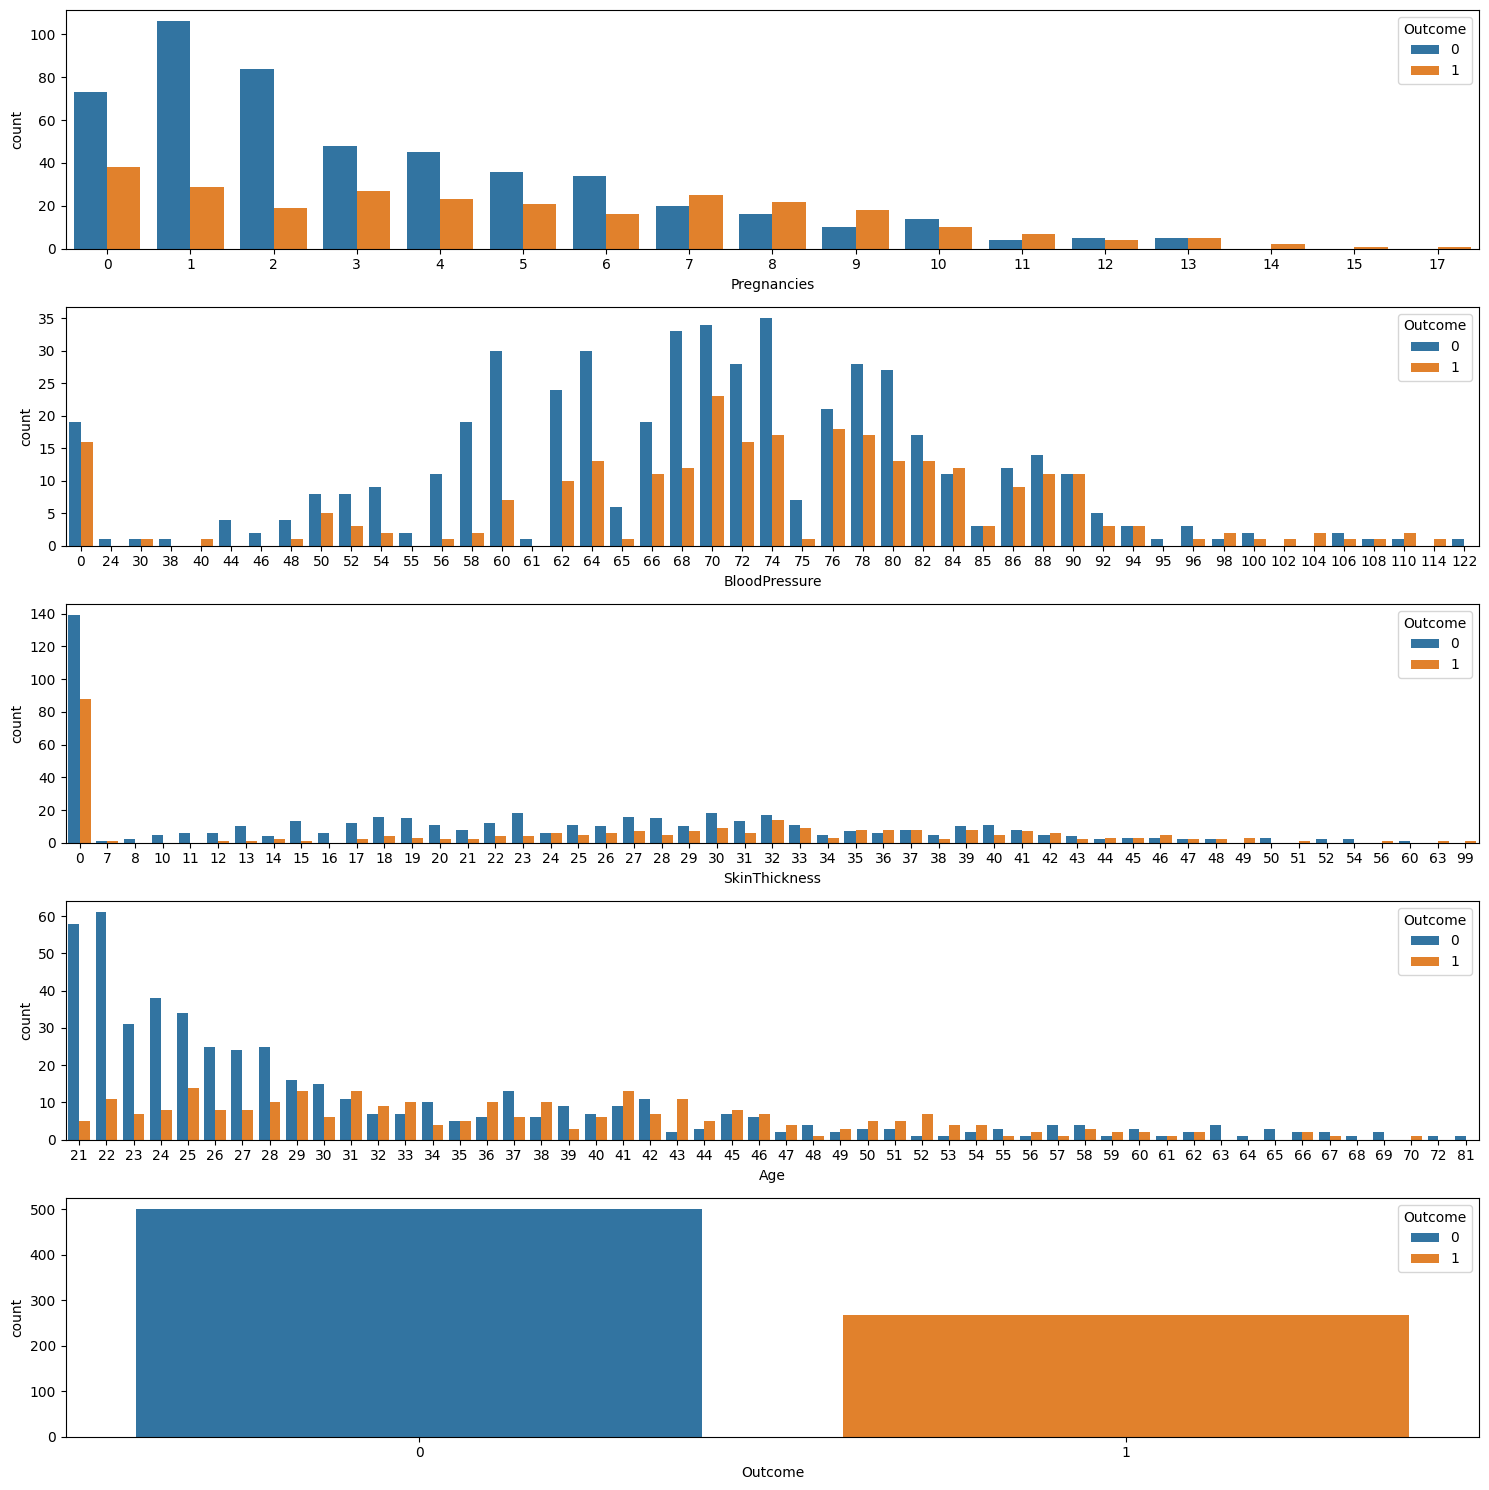

In [9]:
fig, axis = plt.subplots(figsize=(15, 15), nrows=5)
axis = axis.flatten()

variables = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Age', 'Outcome']

for i, variable in enumerate(variables):
    sns.countplot(ax=axis[i], data=raw_data, x=variable, hue='Outcome')

plt.tight_layout()

plt.show()

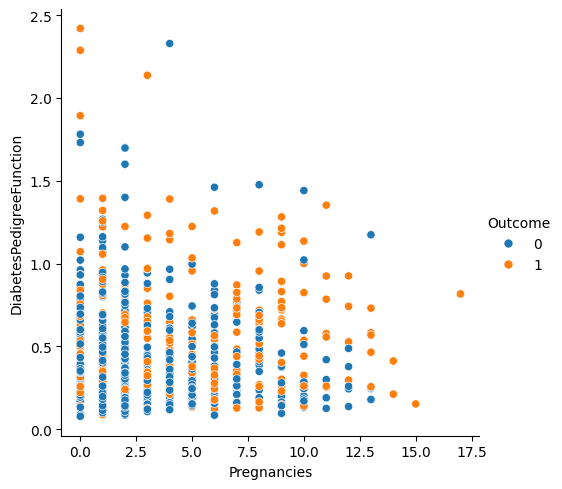

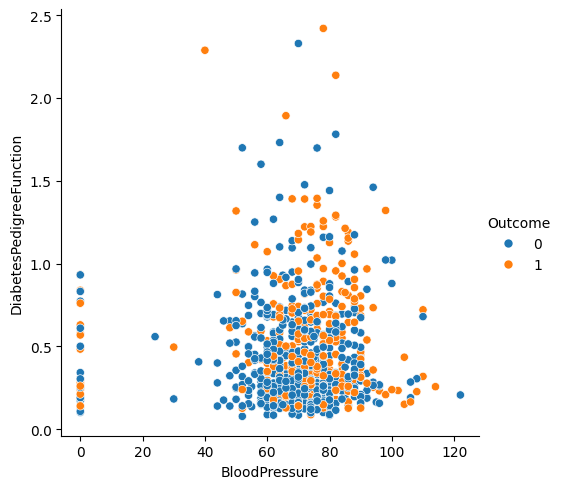

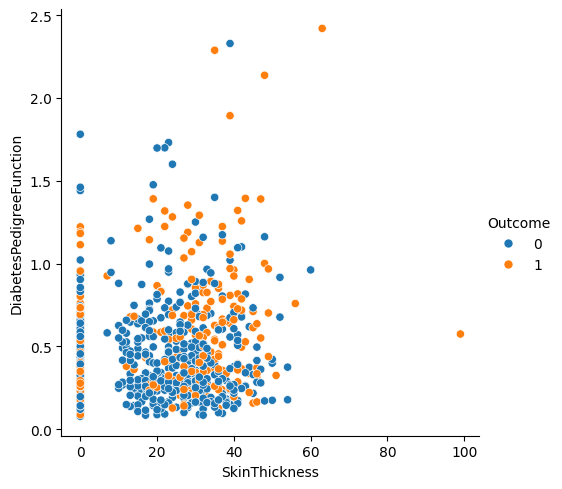

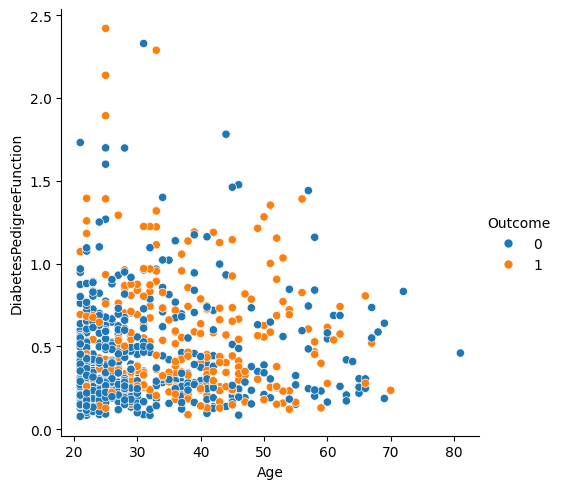

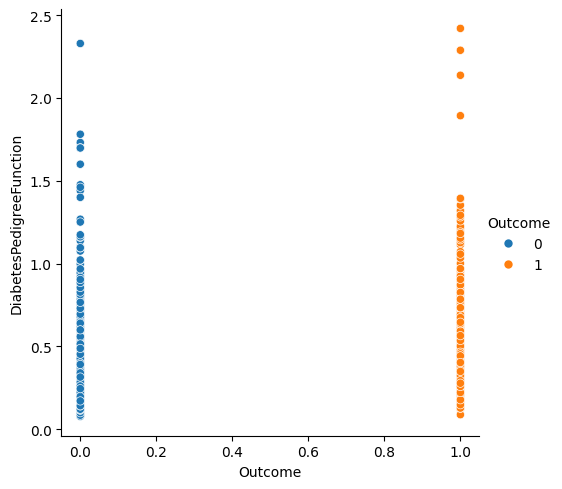

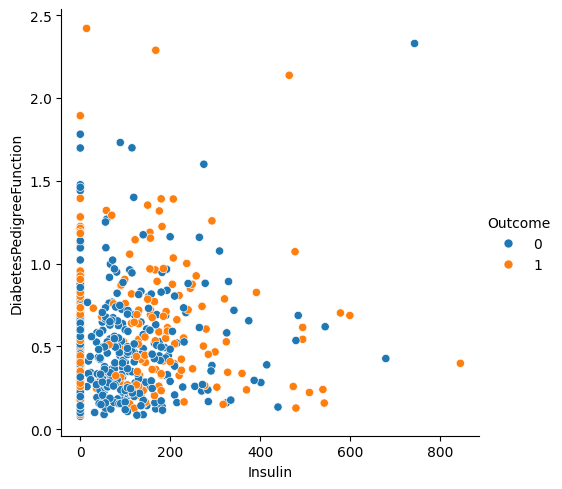

In [10]:
variables = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Age', 'Outcome', 'Insulin']

for variable in variables:
    sns.relplot(data=raw_data, x=variable, y='DiabetesPedigreeFunction', hue='Outcome')

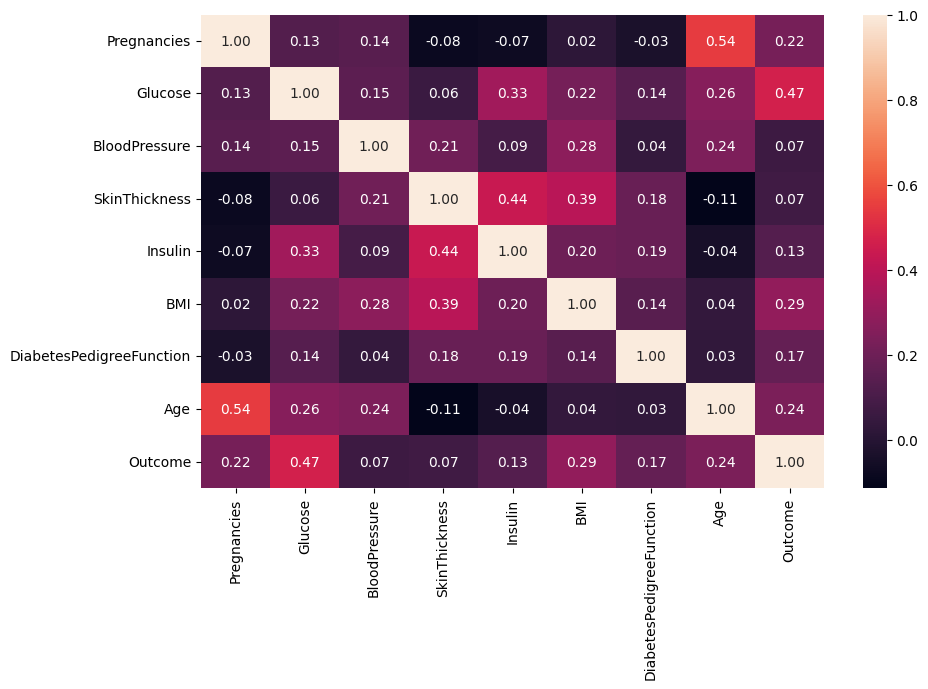

In [11]:
fig, axis = plt.subplots(figsize=(10, 7))

sns.heatmap(raw_data.corr(), annot=True, fmt='.2f')

plt.tight_layout()

plt.show()

## Investigate Outliers

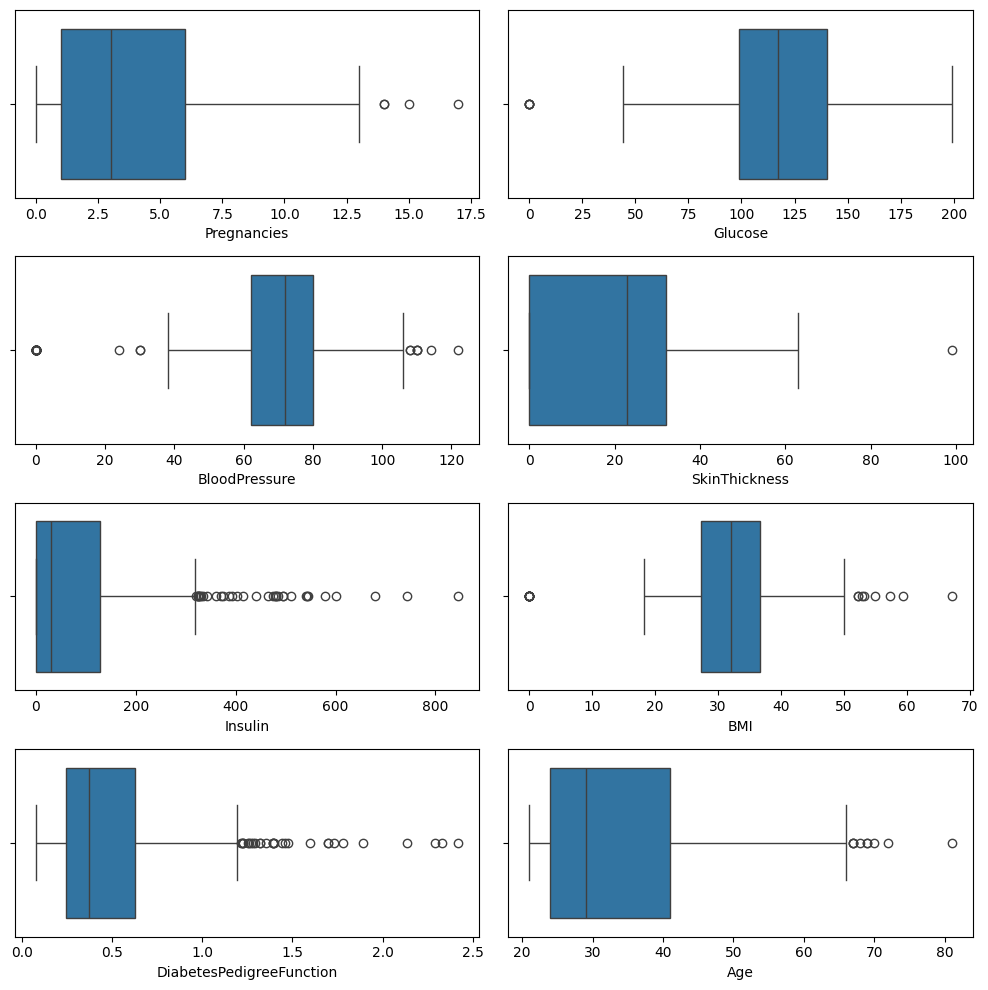

In [12]:
fig, axis = plt.subplots(4, 2, figsize=(10, 10))
axis = axis.flatten()

features = raw_data.drop(columns='Outcome').columns.tolist()

for i, feature in enumerate(features):
    sns.boxplot(ax=axis[i], data=raw_data, x=feature)

plt.tight_layout()

plt.show()

In [13]:
def get_outliers(df, feature):
    stats = df[feature].describe()
    iqr = stats['75%'] - stats['25%']
    upper_limit = stats['75%'] + 1.5 * iqr
    lower_limit = stats['25%'] - 1.5 * iqr
    up_outliers = df[df[feature] > upper_limit]
    low_outliers = df[df[feature] < lower_limit]
    print(f"{feature} Outlier Upper limit: {round(upper_limit, 2)}, Lower limit: {lower_limit}")
    return up_outliers, low_outliers

In [14]:
skin_thick_outliers, _ = get_outliers(raw_data, 'SkinThickness')
skin_thick_outliers

SkinThickness Outlier Upper limit: 80.0, Lower limit: -48.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


In [15]:
preg_outliers, _ = get_outliers(raw_data, 'Pregnancies')
preg_outliers

Pregnancies Outlier Upper limit: 13.5, Lower limit: -6.5


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [16]:
_ , glucose_outliers = get_outliers(raw_data, 'Glucose')
glucose_outliers

Glucose Outlier Upper limit: 202.12, Lower limit: 37.125


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [17]:
bmi_up_outliers, bmi_low_outliers = get_outliers(raw_data, 'BMI')
bmi_up_outliers

BMI Outlier Upper limit: 50.55, Lower limit: 13.35


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
177,0,129,110,46,130,67.1,0.319,26,1
193,11,135,0,0,0,52.3,0.578,40,1
247,0,165,90,33,680,52.3,0.427,23,0
303,5,115,98,0,0,52.9,0.209,28,1
445,0,180,78,63,14,59.4,2.420,25,1
673,3,123,100,35,240,57.3,0.880,22,0


In [18]:
bmi_low_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [19]:
DPF_outliers, _ = get_outliers(raw_data, 'DiabetesPedigreeFunction')
DPF_outliers

DiabetesPedigreeFunction Outlier Upper limit: 1.2, Lower limit: -0.32999999999999996


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
12,10,139,80,0,0,27.1,1.441,57,0
39,4,111,72,47,207,37.1,1.390,56,1
45,0,180,66,39,0,42.0,1.893,25,1
58,0,146,82,0,0,40.5,1.781,44,0
100,1,163,72,0,0,39.0,1.222,33,1
147,2,106,64,35,119,30.5,1.400,34,0
187,1,128,98,41,58,32.0,1.321,33,1
218,5,85,74,22,0,29.0,1.224,32,1
228,4,197,70,39,744,36.7,2.329,31,0


In [20]:
age_outliers, _ = get_outliers(raw_data, 'Age')
age_outliers

Age Outlier Upper limit: 66.5, Lower limit: -1.5


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5,132,80,0,0,26.8,0.186,69,0
363,4,146,78,0,0,38.5,0.520,67,1
453,2,119,0,0,0,19.6,0.832,72,0
459,9,134,74,33,60,25.9,0.460,81,0
489,8,194,80,0,0,26.1,0.551,67,0
537,0,57,60,0,0,21.7,0.735,67,0
666,4,145,82,18,0,32.5,0.235,70,1
674,8,91,82,0,0,35.6,0.587,68,0
684,5,136,82,0,0,0.0,0.640,69,0


In [21]:
insulin_outliers, _ = get_outliers(raw_data, 'Insulin')
insulin_outliers

Insulin Outlier Upper limit: 318.12, Lower limit: -190.875


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
54,7,150,66,42,342,34.7,0.718,42,0
111,8,155,62,26,495,34.0,0.543,46,1
139,5,105,72,29,325,36.9,0.159,28,0
153,1,153,82,42,485,40.6,0.687,23,0
186,8,181,68,36,495,30.1,0.615,60,1
220,0,177,60,29,478,34.6,1.072,21,1
228,4,197,70,39,744,36.7,2.329,31,0
231,6,134,80,37,370,46.2,0.238,46,1


In [22]:
bp_up_outliers, bp_low_outliers = get_outliers(raw_data, 'BloodPressure')
bp_up_outliers

BloodPressure Outlier Upper limit: 107.0, Lower limit: 35.0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
43,9,171,110,24,240,45.4,0.721,54,1
84,5,137,108,0,0,48.8,0.227,37,1
106,1,96,122,0,0,22.4,0.207,27,0
177,0,129,110,46,130,67.1,0.319,26,1
362,5,103,108,37,0,39.2,0.305,65,0
549,4,189,110,31,0,28.5,0.680,37,0
691,13,158,114,0,0,42.3,0.257,44,1


In [23]:
bp_low_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
18,1,103,30,38,83,43.3,0.183,33,0
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
125,1,88,30,42,99,55.0,0.496,26,1
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1


## Split Data into training and testing sets

In [24]:
X = raw_data.drop(columns='Outcome')
y = raw_data['Outcome']

In [25]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [26]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


## Decide which values that are 0 to fill with the sample mean

In [29]:
def fill_mean(df, feature, outlier_limit):
    mean_value = df[feature].replace(0, float('nan')).mean()  # Avoid bias by ignoring zeros in mean calculation
    df[feature] = df[feature].replace(0, mean_value)
    print(df[df[feature] < outlier_limit])
    return df

In [30]:
X_train = fill_mean(X_train, 'Glucose', 37.125)

Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
Index: []


## Create the Random Forest Model

In [31]:
random_forest_model = RandomForestClassifier(random_state = 42)
scores = cross_val_score(random_forest_model, X_train, y_train, cv=5)
scores

array([0.75609756, 0.80487805, 0.77235772, 0.75609756, 0.78688525])

In [32]:
hyperparams = {
    'n_estimators': [100, 150, 200],
    'bootstrap': [True, False],
    'max_depth': ['None', 2, 6, 10],
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [1, 4, 6, 8],
    'max_features': ['None', 'sqrt', 'log2', 4],
}

In [33]:
halving_search = HalvingGridSearchCV(random_forest_model, hyperparams, scoring='balanced_accuracy', cv=5, n_jobs=-1, factor=2)
halving_search

HalvingGridSearchCV(estimator=RandomForestClassifier(random_state=42), factor=2,
                    n_jobs=-1,
                    param_grid={'bootstrap': [True, False],
                                'max_depth': ['None', 2, 6, 10],
                                'max_features': ['None', 'sqrt', 'log2', 4],
                                'min_samples_leaf': [1, 4, 6, 8],
                                'min_samples_split': [2, 6, 10],
                                'n_estimators': [100, 150, 200]},
                    scoring='balanced_accuracy')

In [ ]:
run_halv_grid = True

if run_halv_grid:
    import warnings
    warnings.filterwarnings("ignore")

    halving_search.fit(X_train, y_train)
    print(f"Best hyperparameters: {halving_search.best_params_}")

Best hyperparameters: {'bootstrap': True, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [37]:
tuned_random_forest_model = RandomForestClassifier(n_estimators=100, bootstrap=True, max_depth=6, min_samples_split=10, min_samples_leaf=1, max_features='sqrt', random_state = 42)
scores = cross_val_score(random_forest_model, X_train, y_train, cv=5)
scores

array([0.75609756, 0.80487805, 0.77235772, 0.75609756, 0.78688525])

In [39]:
tuned_random_forest_model.fit(X_train, y_train)
y_pred = tuned_random_forest_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [40]:
accuracy_score(y_test, y_pred)

0.7402597402597403

In [41]:
dump(tuned_random_forest_model, open("../models/random_forest_bootstrap-True_nestimators-100_maxdepth-6_maxfeat-sqrt_minsampleaf-1_minsplit-10_42.sav", "wb"))